In [1]:
data = read.csv("fit_data_dao.csv")

In [2]:
data = data[,colSums(data) >0 ]
dim(data)

[1] 2139  112

In [3]:
summary(data)

      Mod              Udl              time           Pop1        
 Min.   :   4.0   Min.   :     0   Min.   :  92   Min.   :0.00000  
 1st Qu.: 715.5   1st Qu.:   414   1st Qu.:1512   1st Qu.:0.00000  
 Median :1586.0   Median :  1290   Median :2058   Median :0.00000  
 Mean   :1902.5   Mean   :  5328   Mean   :1799   Mean   :0.01029  
 3rd Qu.:3363.5   3rd Qu.:  4276   3rd Qu.:2249   3rd Qu.:0.00000  
 Max.   :4399.0   Max.   :291059   Max.   :2330   Max.   :1.00000  
     Pop10     Companion_Anders_DA2 Companion_Isabela     Chargen       
 Min.   :0.0   Min.   :0.000000     Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.0   1st Qu.:0.000000     1st Qu.:0.000000   1st Qu.:0.00000  
 Median :0.0   Median :0.000000     Median :0.000000   Median :0.00000  
 Mean   :0.1   Mean   :0.000935     Mean   :0.001403   Mean   :0.06358  
 3rd Qu.:0.0   3rd Qu.:0.000000     3rd Qu.:0.000000   3rd Qu.:0.00000  
 Max.   :1.0   Max.   :1.000000     Max.   :1.000000   Max.   :1.00000  
 CompanionFri

In [4]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.7)

,Mod,time,Official,Czech,French,Italian,Japanese,Otherlanguages,Polish,Spanish
Mod,1.000000000,-0.999980776,0.044892722,0.043256301,-0.031868040,-0.033434566,-0.005271487,0.058244711,-0.010930750,-0.054294456
time,-0.999980776,1.000000000,-0.044811985,-0.043185929,0.031887371,0.033511496,0.005344094,-0.058119528,0.010982616,0.054343050
Official,0.04489272,-0.04481199,1.00000000,0.77423395,0.37636856,0.37636856,0.44595561,0.77423395,0.33784934,0.33784934
Czech,0.04325630,-0.04318593,0.77423395,1.00000000,0.48611735,0.48611735,0.57599594,0.79953140,0.43636596,0.43636596
French,-0.03186804,0.03188737,0.37636856,0.48611735,1.00000000,0.85572643,0.84395969,0.38792991,0.76784116,0.76784116
Italian,-0.03343457,0.03351150,0.37636856,0.48611735,0.85572643,1.00000000,0.84395969,0.38792991,0.76784116,0.76784116
Japanese,-0.005271487,0.005344094,0.445955608,0.575995939,0.843959690,0.843959690,1.000000000,0.459983197,0.757585141,0.757585141
Otherlanguages,0.05824471,-0.05811953,0.77423395,0.79953140,0.38792991,0.38792991,0.45998320,1.00000000,0.34801889,0.34801889
Polish,-0.01093075,0.01098262,0.33784934,0.43636596,0.76784116,0.76784116,0.75758514,0.34801889,1.00000000,0.68852161
Spanish,-0.05429446,0.05434305,0.33784934,0.43636596,0.76784116,0.76784116,0.75758514,0.34801889,0.68852161,1.00000000


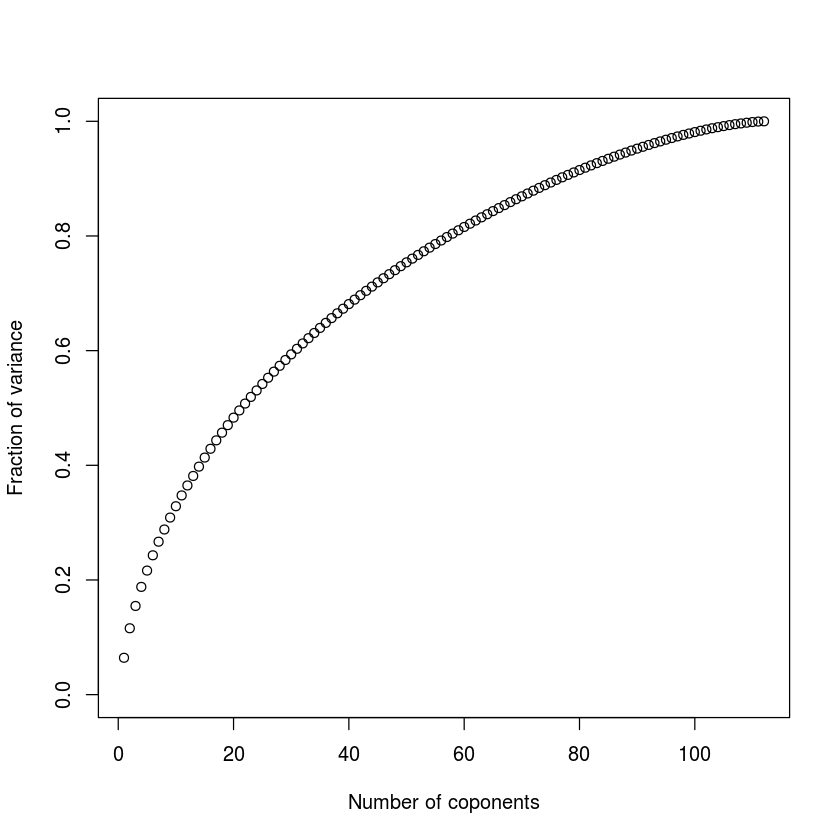

In [5]:
plot(1:112,cumsum(prcomp(data, retx=F,scale=T)$sdev^2)/sum(prcomp(data, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");

In [6]:
res<-prcomp(data, retx=F,scale=T)$rotation[,1:3];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:3)
  print(t(res[resAbs[,i]>.1,i,drop=FALSE]));

    CompanionFriendly Companions Compilation     ForDAO   Official Unbalanced
PC1        -0.1052607 -0.1044283  -0.1364351 -0.1032554 -0.2101114 -0.1440402
    Companion_Mhairi Companion_Morrigan Companion_Oghren Companion_Wynne
PC1       -0.1022885         -0.1085269       -0.1171866      -0.1096385
    SingleplayerCampaign Lore_Friendly      Czech   English     French
PC1           -0.1164241    -0.1169843 -0.2229908 -0.143781 -0.2382022
        German    Italian   Japanese Otherlanguages     Polish    Russian
PC1 -0.1963144 -0.2405414 -0.2470456     -0.2012403 -0.2258235 -0.2185541
       Spanish NPCVendors       NPCs PlantsFoliage      none
PC1 -0.2334135 -0.1184707 -0.1013048     -0.161481 0.1095654
    Companions   Official Companion_Anders Companion_Justice
PC2   0.148793 -0.1418586        0.1267531         0.1264708
    Companion_Nathaniel Companion_Sigrun Companion_Velanna Companion_Alistair
PC2           0.1460189        0.1355311         0.1372971          0.1749946
    Comp

In [7]:
colnames(data)

[1] "Mod"                         "Udl"                        
  [3] "time"                        "Pop1"                       
  [5] "Pop10"                       "Companion_Anders_DA2"       
  [7] "Companion_Isabela"           "Chargen"                    
  [9] "CompanionFriendly"           "Companions"                 
 [11] "Compilation"                 "ForDA2"                     
 [13] "ForDAA"                      "ForDAO"                     
 [15] "Forfemalecharacters"         "Formalecharacters"          
 [17] "GameplayEffectsChanges"      "Official"                   
 [19] "PerformanceOptimization"     "RelatedtoMoviesTVOtherGames"
 [21] "Replacer"                    "Cheating"                   
 [23] "Fairandbalanced"             "Unbalanced"                 
 [25] "Companion_Anders"            "Companion_Justice"          
 [27] "Companion_Mhairi"            "Companion_Nathaniel"        
 [29] "Companion_Sigrun"            "Companion_Velanna"          
 [31] "Companion_Alistair"          "Companion_Dog"              
 [33] "Companion_Leliana"           "Companion_Loghain"          
 [35] "Companion_Morrigan"          "Companion_New_Female"       
 [37] "Companion_New_Male"          "Companion_Oghren"           
 [39] "Companion_Shale"             "Companion_Sten"             
 [41] "Companion_Wynne"             "Companion_Zevran"           
 [43] "Animation_Modified"          "Animation_New"              
 [45] "Audio_Music"                 "Audio_SoundFX"              
 [47] "Audio_Voices"                "Bodymodels"                 
 [49] "Classescomponent"            "Environment_Other"          
 [51] "Environment_Sky"             "Environment_Weather"        
 [53] "Facemodels"                  "Hair"                       
 [55] "Lighting"                    "NewLands"                   
 [57] "Newmodels"                   "Newtextures"                
 [59] "Quests"                      "Races_Modified"             
 [61] "Races_New"                   "ScriptedEvents"             
 [63] "SingleplayerCampaign"        "Skills"                     
 [65] "Video"                       "Anime"                      
 [67] "Lore_Friendly"               "NotLore_Friendly"           
 [69] "Nudity"                      "Savedgames"                 
 [71] "SexySkimpy"                  "Translation"                
 [73] "Unrealistic"                 "Czech"                      
 [75] "English"                     "French"                     
 [77] "German"                      "Italian"                    
 [79] "Japanese"                    "Otherlanguages"             
 [81] "Polish"                      "Russian"                    
 [83] "Spanish"                     "Armor_Shields"              
 [85] "Books"                       "Clothing"                   
 [87] "Clothing_Female"             "Clothing_Male"              
 [89] "Creatures"                   "Items_Apparatus"            
 [91] "Items_Clutter"               "Items_Furniture"            
 [93] "Items_Ingredients"           "Locations_Buildings"        
 [95] "Locations_Caverns"           "Locations_Dungeons"         
 [97] "Locations_WorldMap"          "Magic_Enchantments"         
 [99] "Magic_Potions"               "Magic_Spells"               
[101] "NPCVendors"                  "NPCs"                       
[103] "PlantsFoliage"               "Weapons"                    
[105] "ModdersResource"             "Non_PlayableResource"       
[107] "TutorialsforModders"         "TutorialsforPlayers"        
[109] "UserInterface"               "UtilitiesforModders"        
[111] "UtilitiesforPlayers"         "none"

In [8]:
modl <- glm(Pop1 ~. - Mod - Udl - Pop1 - Pop10,family=binomial,data=data);
summary(modl);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop1 ~ . - Mod - Udl - Pop1 - Pop10, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0061  -0.0258   0.0000   0.0000   3.8649  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.518e+01  4.462e+00  -3.401 0.000671 ***
time                         3.263e-03  1.965e-03   1.661 0.096762 .  
Companion_Anders_DA2        -2.928e+01  4.768e+04  -0.001 0.999510    
Companion_Isabela           -1.750e+01  3.879e+04   0.000 0.999640    
Chargen                     -6.373e-01  1.625e+00  -0.392 0.694955    
CompanionFriendly           -1.324e+01  5.258e+03  -0.003 0.997990    
Companions                   2.921e-01  1.464e+00   0.200 0.841858    
Compilation                 -1.392e+01  1.616e+04  -0.001 0.999312    
ForDA2                       6.958e+00  7.219e+00   0.964 0.335062    
ForDAA                       2.395e+00  6.065e+00   0.395 0.692903

In [9]:
modl2 <- glm(Pop10 ~ . - Mod - Udl - Pop1 - Pop10,family=binomial,data=data);
summary(modl2);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop10 ~ . - Mod - Udl - Pop1 - Pop10, family = binomial, 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1382  -0.3808  -0.1871  -0.0696   3.4819  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -7.017e+00  8.299e-01  -8.456  < 2e-16 ***
time                         1.809e-03  3.801e-04   4.759 1.94e-06 ***
Companion_Anders_DA2        -1.993e+01  3.745e+03  -0.005 0.995754    
Companion_Isabela           -1.462e+01  3.410e+03  -0.004 0.996578    
Chargen                      6.813e-01  3.565e-01   1.911 0.056037 .  
CompanionFriendly           -2.295e-01  8.418e-01  -0.273 0.785147    
Companions                   4.710e-01  3.278e-01   1.437 0.150846    
Compilation                  1.357e+00  1.744e+00   0.778 0.436588    
ForDA2                       1.806e+00  2.837e+00   0.637 0.524404    
ForDAA                       3.132e-03  8.846e-01   0.004 0.99717

In [10]:
anova(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,2138,245.1632,NA
time,1,20.46959,2137,224.6936,6.058617e-06
Companion_Anders_DA2,1,0.0002115006,2136,224.6934,0.9883967
Companion_Isabela,1,0.0002457044,2135,224.6932,0.9874937
Chargen,1,6.352825,2134,218.3403,0.01171945
CompanionFriendly,1,0.0824299,2133,218.2579,0.7740311
Companions,1,7.765466,2132,210.4924,0.005325455
Compilation,1,0.0374891,2131,210.4549,0.8464726
ForDA2,1,5.28817,2130,205.1668,0.02147077
ForDAA,1,0.3555848,2129,204.8112,0.5509686


In [11]:
anova(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,2138,1391.144,NA
time,1,59.9768,2137,1331.168,9.598205e-15
Companion_Anders_DA2,1,0.1125832,2136,1331.055,0.7372221
Companion_Isabela,1,0.1557706,2135,1330.899,0.6930807
Chargen,1,4.750322,2134,1326.149,0.02929281
CompanionFriendly,1,7.401931,2133,1318.747,0.006515391
Companions,1,13.39399,2132,1305.353,0.0002524324
Compilation,1,0.2531172,2131,1305.1,0.6148887
ForDA2,1,0.9486871,2130,1304.151,0.3300537
ForDAA,1,0.8961142,2129,1303.255,0.3438258


In [12]:
drop1(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,86.55921,304.5592,NA,NA
time,1,90.91952,306.9195,4.360309,0.03678564
Companion_Anders_DA2,1,86.77739,302.7774,0.2181757,0.6404334
Companion_Isabela,1,86.57527,302.5753,0.0160551,0.899171
Chargen,1,86.72247,302.7225,0.1632545,0.6861777
CompanionFriendly,1,86.57373,302.5737,0.01451673,0.9040986
Companions,1,86.59804,302.598,0.03883192,0.843782
Compilation,1,86.56233,302.5623,0.003121406,0.9554457
ForDA2,1,87.12877,303.1288,0.569562,0.450433
ForDAA,1,86.66155,302.6615,0.1023339,0.7490466


In [13]:
drop1(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,899.1108,1117.111,NA,NA
time,1,931.8394,1147.839,32.7286,1.059668e-08
Companion_Anders_DA2,1,900.4671,1116.467,1.356312,0.2441776
Companion_Isabela,1,899.2273,1115.227,0.1164647,0.7329009
Chargen,1,902.6134,1118.613,3.502578,0.06127336
CompanionFriendly,1,899.1859,1115.186,0.0751156,0.7840291
Companions,1,901.1357,1117.136,2.024917,0.1547373
Compilation,1,899.6528,1115.653,0.5419816,0.4616126
ForDA2,1,899.4884,1115.488,0.3775979,0.5388916
ForDAA,1,899.1108,1115.111,1.253167e-05,0.9971755
